## DAND P2 INVESTIGATE A DATASET##

*** By Richard Lorenzo***

***email: rl1891@att.com***

*** Introduction*** My personal knowledge of Baseball is limited, however, I hope that allows me to analyze the data from a data-centric
prespective without preconceptions.

*** Dataset Analyzed*** is Sean Lahman Baseball data from 1871 to 2014.

The Data Source was downloaded from www.seanlahman.com.
By Richard Lorenzo
email: rl1891@att.com
I Analysed the 

***Questions for investigation:***
1. The dataset includes basic player information including birthdate, birth city, height, weight, L/R Handedness, debut date, and final game date.  Which, if any, of these are correlated with a player having won awards.

2. How has pitcher's ERA varied with hitting statistics over time?  I compared ERA to Runs/At-Bats.

***What I did to investigate these questions?***
1. I imported the .csv files into Pandas dataframes
2. I cleansed the data to correct different year formats
3. I derived years played from the debut year and final year
4. I scaled hitting and throwing handedness to numerical values.
5. I mapped the players who won awards in their careers
6. I used the Pandas describe function to compare the sample of Players who won awards to the whole population of players.
7. Using T tests, I proposed a null Hypothosis for each variable and rejected, or failed to reject them.
8. I analyzed histograms of the following distributions - Years Played (all vs won-Awards), Birth Year (all vs won-Awards)
9. I imported the Pitching and Batting data and grouped the statistics by year.
10. I visually looked for correlations with a scatter plot which showed different correlations over time.  I calculated Pearson's r to measure the coorelation.
11. I analyzed the Pitching-Hitting correlations over different years to increase each correlation and showed the associated scatter plots.

*** Data Wrangling***  I imported the csv files and corrected different year formats

*** Summary statistics and plots *** included ate the end of the notebook

*** Webisites and sources used ***
1. Udacity DAND material
2. v19.2 Pandas documentation
3. Matplotlib documentation
4. Miscellaneous Stackoverflow posts



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
df_master = pd.read_csv("master.csv", index_col='playerID')
# Look at the available columns
df_master.dtypes

birthYear       float64
birthMonth      float64
birthDay        float64
birthCountry     object
birthState       object
birthCity        object
deathYear       float64
deathMonth      float64
deathDay        float64
deathCountry     object
deathState       object
deathCity        object
nameFirst        object
nameLast         object
nameGiven        object
weight          float64
height          float64
bats             object
throws           object
debut            object
finalGame        object
retroID          object
bbrefID          object
dtype: object

In [3]:
# Select the features we want to look for correlation
# Filter players with missing information
df_master1 = df_master[['birthYear', 'birthMonth', 'birthCountry', 'weight', 'height',\
           'bats', 'throws', 'debut', 'finalGame' ]].dropna(axis =0)
df_master1.head(10)

,birthYear,birthMonth,birthCountry,weight,height,bats,throws,debut,finalGame
playerID,,,,,,,,,
aardsda01,1981,12,USA,205,75,R,R,4/6/2004,9/28/2013
aaronha01,1934,2,USA,180,72,R,R,4/13/1954,10/3/1976
aaronto01,1939,8,USA,190,75,R,R,4/10/1962,9/26/1971
aasedo01,1954,9,USA,190,75,R,R,7/26/1977,10/3/1990
abadan01,1972,8,USA,184,73,L,L,9/10/2001,4/13/2006
abadfe01,1985,12,D.R.,220,73,L,L,7/28/2010,9/27/2014
abadijo01,1854,11,USA,192,72,R,R,1875-04-26,1875-06-10
abbated01,1877,4,USA,170,71,R,R,1897-09-04,9/15/1910
abbeybe01,1869,11,USA,175,71,R,R,1892-06-14,1896-09-23


In [4]:
# ToDo: Clean-Up the dates into Debut Year and Final Game Year
def clean_date(s): 
    if s[:3].isdigit():
        return int(s[:4])
    else:
        l = len(s)
        return int(s[(l-4):l])

df_master1['debut_yr'] = df_master1['debut'].apply(clean_date)
df_master1['final_yr'] = df_master1['finalGame'].apply(clean_date)

df_master1.head(5)

,birthYear,birthMonth,birthCountry,weight,height,bats,throws,debut,finalGame,debut_yr,final_yr
playerID,,,,,,,,,,,
aardsda01,1981,12,USA,205,75,R,R,4/6/2004,9/28/2013,2004,2013
aaronha01,1934,2,USA,180,72,R,R,4/13/1954,10/3/1976,1954,1976
aaronto01,1939,8,USA,190,75,R,R,4/10/1962,9/26/1971,1962,1971
aasedo01,1954,9,USA,190,75,R,R,7/26/1977,10/3/1990,1977,1990
abadan01,1972,8,USA,184,73,L,L,9/10/2001,4/13/2006,2001,2006


Refine the Independent variables.

debut_yr and final_yr are correlated with birthYear.  The more interesting variable is years played.

Also, let's convert country, bats, and throws to a numeric scale to simplify the analysis
- Country: USA = 1, Other = 0
- bats/throws: R = +1, B = 0, L = -1

In [5]:
df_master1['yearsPlayed'] = df_master1['final_yr'] - df_master1['debut_yr']
df_master1['country_num'] = df_master1['birthCountry'].apply(lambda s: 1 if s=='USA' else 0)
df_master1['bats_num'] = df_master1['bats'].apply(lambda s: -1 if s=='L' else 1 if s=='R' else 0)
df_master1['throws_num'] = df_master1['throws'].apply(lambda s: -1 if s=='L' else 1)
df_master1.head(5)

,birthYear,birthMonth,birthCountry,weight,height,bats,throws,debut,finalGame,debut_yr,final_yr,yearsPlayed,country_num,bats_num,throws_num
playerID,,,,,,,,,,,,,,,
aardsda01,1981,12,USA,205,75,R,R,4/6/2004,9/28/2013,2004,2013,9,1,1,1
aaronha01,1934,2,USA,180,72,R,R,4/13/1954,10/3/1976,1954,1976,22,1,1,1
aaronto01,1939,8,USA,190,75,R,R,4/10/1962,9/26/1971,1962,1971,9,1,1,1
aasedo01,1954,9,USA,190,75,R,R,7/26/1977,10/3/1990,1977,1990,13,1,1,1
abadan01,1972,8,USA,184,73,L,L,9/10/2001,4/13/2006,2001,2006,5,1,-1,-1


Next we identify the players that have won awards vs. no awards.

Import the awards Dataframe, and join it to the master Dataframe

In [6]:
df_awards = pd.read_csv("AwardsPlayers.csv", index_col='playerID')
# Since we want to look as any awards, add a wonAward boolean
df_awards['wonAward'] = True

# Join the Dataframes and create a new Dataframe with just the key information
df_master2 = df_master1.join(df_awards['wonAward'])\
                .drop_duplicates()[['birthYear', 'birthMonth', 'birthCountry', 'weight',\
                                    'height', 'bats_num', 'throws_num', 'yearsPlayed', 'wonAward']]
df_master2.head(5)

,birthYear,birthMonth,birthCountry,weight,height,bats_num,throws_num,yearsPlayed,wonAward
playerID,,,,,,,,,
aardsda01,1981,12,USA,205,75,1,1,9,NaN
aaronha01,1934,2,USA,180,72,1,1,22,True
aaronto01,1939,8,USA,190,75,1,1,9,NaN
aasedo01,1954,9,USA,190,75,1,1,13,NaN
abadan01,1972,8,USA,184,73,-1,-1,5,NaN


In [7]:
df_won = df_master2[(df_master2['wonAward'] == True)]
df_notWon = df_master2[(df_master2['wonAward'] != True)]

print 'Players with Awards'
print df_won.describe()
print '\n All Players'
print df_master2.describe()

Players with Awards
         birthYear   birthMonth       weight       height     bats_num  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean   1941.071264     6.657471   189.891188    72.652107     0.352490   
std      31.812000     3.387532    21.530983     2.361835     0.892133   
min    1854.000000     1.000000   125.000000    65.000000    -1.000000   
25%    1916.000000     4.000000   175.000000    71.000000    -1.000000   
50%    1947.000000     7.000000   185.000000    73.000000     1.000000   
75%    1967.000000    10.000000   200.000000    74.000000     1.000000   
max    1992.000000    12.000000   295.000000    82.000000     1.000000   

        throws_num  yearsPlayed  
count  1305.000000  1305.000000  
mean      0.627586    13.173180  
std       0.778846     4.620976  
min      -1.000000     0.000000  
25%       1.000000    10.000000  
50%       1.000000    13.000000  
75%       1.000000    16.000000  
max       1.000000    31.000000  

 All P

*** Analysis ***

Only 7.7% of all players have won awards.

The following table compares the Won-Award Players to the population of all players

<img src="Picture2.png" />

From this analysis, the evidence supports that Players who have won awards are:
- Born Later (need to check if awards/players increased over time)
- Bigger (weigh more and are taller)  Although significant, it is import that this does not imply causation.
- Play longer (It is expected that better players play longer.  Histograms areshown next)

Although Players with awards are slightly more left-handed at batting and throwing, the p-values are only 0.2672	0.1648 respectively and are not stistically significant.

Birth Month is also consistent between players with awards to all players.  (I included this because there are studies showing a link in birth month for Canadian hockey players due to league cut-offs in childrens leagues.  This is not supported for Baseball players.)



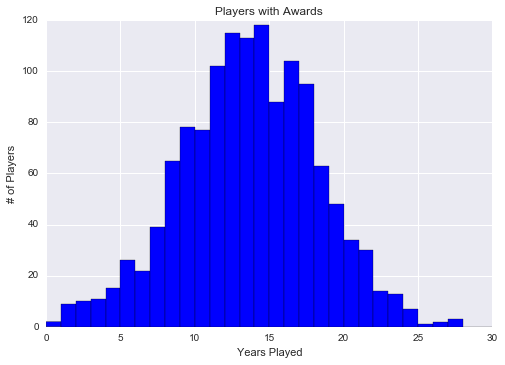

In [8]:
############################
# Histogram of Years Played by Players who have won Awards
#
plt.hist(df_won['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='b')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

The distribution for Players with Awards (shown above) is close to a normal distribtion which is expected.

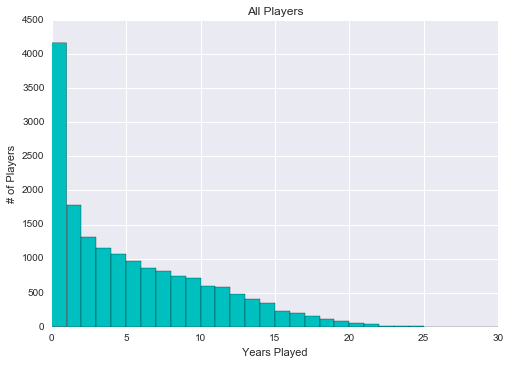

In [9]:
############################
# Histogram of Years Played For All Players
#
plt.hist(df_master2['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='c')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

The distribution for All Players (shown above) is the oppposite with hyperbolic distribtion.

The next histograms compare the distribution of birth year


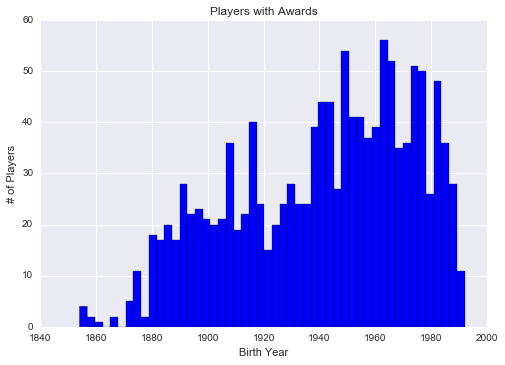

In [10]:
############################
# Histogram of Birth Year by Players who have won Awards
#
plt.hist(df_won['birthYear'],histtype='bar', bins = 50,color ='b')
plt.xlabel('Birth Year')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

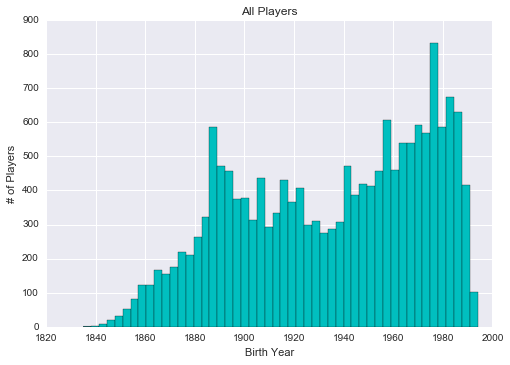

In [11]:
############################
# Histogram of Birth Year For All Players
#
plt.hist(df_master2['birthYear'],histtype='bar', bins = 50, color ='c')
plt.xlabel('Birth Year')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

Both histograms for Players with Awards and All Players have similar distributions

In [12]:
#  Import the pitching data
df_pitching = pd.read_csv("pitching.csv")
# Get the Average ERA for each year
df_ERA_byYear = df_pitching[['ERA', 'yearID']].groupby('yearID').mean()

#  Get the Batting data
df_Batting = pd.read_csv("Batting.csv")

# Runs per At Bats should a better metic than batting average
df_runs_byYear = df_Batting[['R','AB','yearID']].groupby('yearID').sum()
df_runs_byYear['R_per_AB'] = df_runs_byYear['R'] / df_runs_byYear['AB']

# Joint the data to make a single df with the information we need
df_ERA_R_AB = df_ERA_byYear.join(df_runs_byYear['R_per_AB'])
df_ERA_R_AB.head()

,ERA,R_per_AB
yearID,,
1871,5.991579,0.245703
1872,4.798696,0.216213
1873,4.315600,0.210911
1874,4.899412,0.181637
1875,4.239149,0.157791


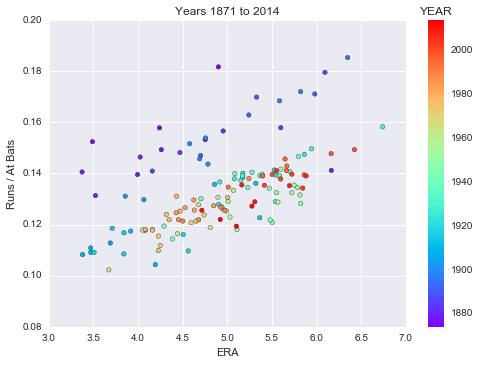

In [13]:
############################
# Scatter Plot of ERA vs. Runs / At bats
#
#  Scale the plot to drop the outliers

def plot_scatter(df, max_x, max_y, min_Year, max_Year):
    # Filter the Dataframe
    dfx = df['ERA'][(df['R_per_AB'] < max_y) & (df['ERA'] < max_x) ]
    dfx = dfx.loc[dfx.index <= max_Year]
    dfx = dfx.loc[dfx.index >= min_Year]
    dfy = df['R_per_AB'][(df['R_per_AB'] < max_y) & (df['ERA'] < max_x)]
    dfy = dfy.loc[dfy.index <= max_Year]
    dfy = dfy.loc[dfy.index >= min_Year]

    plt.scatter(dfx, dfy, c = dfx.index.tolist(),cmap=cm.rainbow)
    plt.xlabel('ERA')
    plt.ylabel('Runs / At Bats')
    plt.title('Years '+ str(min_Year) + ' to ' + str(max_Year))
    clb = plt.colorbar()
    clb.ax.set_title('YEAR')
    plt.show()

def pearsons_r(df, min_Year, max_Year):
    # Filter the Dataframe
    df = df.loc[df.index <= max_Year]
    df = df.loc[df.index >= min_Year]
    return df.corr()

plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 2014)


In [14]:
#  Use Pandas corr function to get Pearson's r correlation
pearsons_r(df_ERA_R_AB, 1871, 2014)

,ERA,R_per_AB
ERA,1.000000,0.524192
R_per_AB,0.524192,1.000000


Pearson's R show they are somewhat correlated at 0.52.

However, the scatter plot shows the correlations from 1871 through ~ 1910 have an offset which may be weaking the correlation.  Let's separate these date ranges.


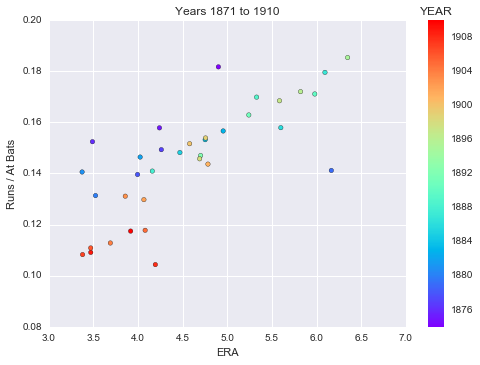

In [15]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 1910)

In [16]:
pearsons_r(df_ERA_R_AB, 1871, 1910)

,ERA,R_per_AB
ERA,1.000000,0.631948
R_per_AB,0.631948,1.000000


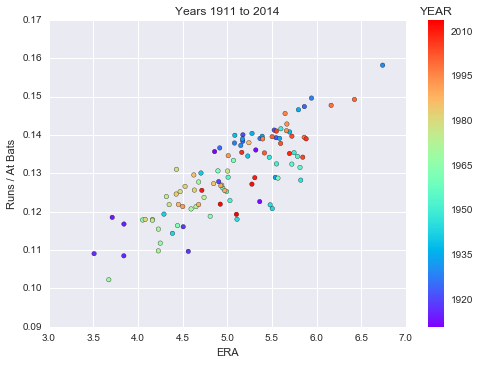

In [17]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1911, 2014)

In [18]:
pearsons_r(df_ERA_R_AB, 1911, 2014)

,ERA,R_per_AB
ERA,1.000000,0.831108
R_per_AB,0.831108,1.000000


As you can see, by splitting the analysis from (1871 - 1910) and (1911 - 2014) the correlations have increased. I will let others who are more knowledgble with baseball explain what happened to Baseball ~ 1910 to change Pitching / Hitting dynamics.

-----------
# Summary of statistics and plots #

<img src="Picture2.png" />

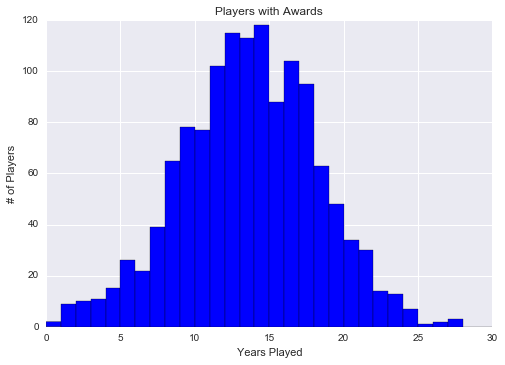

In [19]:
############################
# Histogram of Years Played by Players who have won Awards
#
plt.hist(df_won['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='b')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

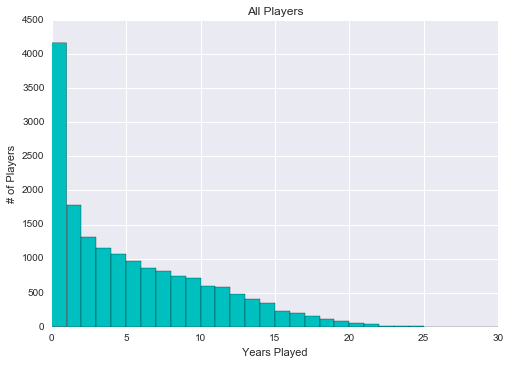

In [20]:
############################
# Histogram of Years Played For All Players
#
plt.hist(df_master2['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='c')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

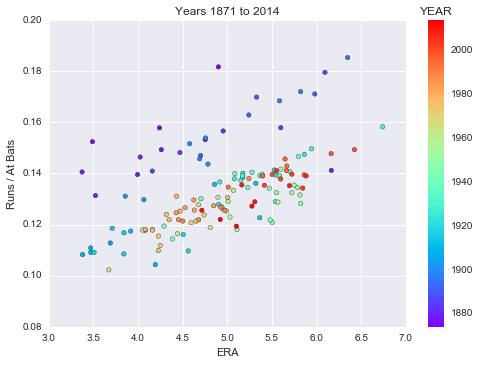

,ERA,R_per_AB
ERA,1.000000,0.524192
R_per_AB,0.524192,1.000000


In [22]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 2014)
pearsons_r(df_ERA_R_AB, 1871, 2014)

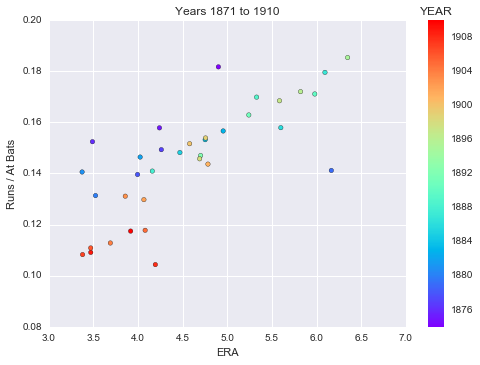

,ERA,R_per_AB
ERA,1.000000,0.631948
R_per_AB,0.631948,1.000000


In [24]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 1910)
pearsons_r(df_ERA_R_AB, 1871, 1910)

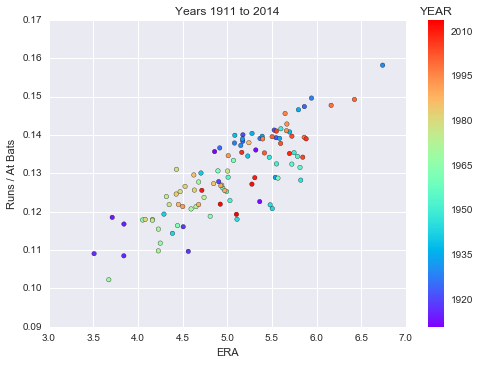

,ERA,R_per_AB
ERA,1.000000,0.831108
R_per_AB,0.831108,1.000000


In [25]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1911, 2014)
pearsons_r(df_ERA_R_AB, 1911, 2014)